In [26]:
import os
os.chdir('/Users/ngdnh/Codespace/PulsatingPulseShop/')

%config InlineBackend.figure_formats = ['svg']

In [27]:
import numpy as np
import utility as ut
import pickle
import datetime 
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import gaussian_kde
import qutip as qt
from scipy.optimize import minimize

today = datetime.datetime.now()

print(f'Now is {today}')

Now is 2025-02-09 01:12:01.373490


#### Load discriminator

In [28]:
rabi_discrim = np.load('./rabi_discrim.pkl', allow_pickle=True)

rabi_discrim

{'cluster_0_mean': np.complex64(-34.688778+33.247574j),
 'cluster_2_mean': np.complex64(22.613844+8.244572j),
 'radius_fit': 31.259960326732763}

In [29]:
def in_zero(point: complex):
    d = ut.distance(rabi_discrim['cluster_0_mean'], point)
    if d < rabi_discrim['radius_fit']:
        return True
    else:
        return False

def in_two(point: complex):
    d = ut.distance(rabi_discrim['cluster_2_mean'], point)
    if d < rabi_discrim['radius_fit']:
        return True
    else:
        return False
    
def discriminate(iq_data_level1):
    
    normal_points = []
    abnormal_points = []
    pop = []

    for data_point in iq_data_level1:
        abnormal_zero = []
        normal_zero = []
        normal_one = []
        abnormal_two = []
        normal_two = []
        for shot in data_point:
            if (in_zero(shot) == True):
                normal_zero.append(shot)
                continue
            if (in_two(shot) == True):
                normal_two.append(shot)
                continue
            else:
                if np.real(shot) < 0:
                    abnormal_zero.append(shot)
                    continue 
                if np.imag(shot) < 0:
                    abnormal_two.append(shot)
                    continue 
                else:
                    normal_one.append(shot)
        
        pop0 = (len(normal_zero)+len(abnormal_zero))/iq_data_level1.shape[1]
        pop1 = len(normal_one)/iq_data_level1.shape[1]
        pop2 = (len(normal_two)+len(abnormal_two))/iq_data_level1.shape[1]

        if np.abs(pop0+pop1+pop2 - 1.0) > 1e-14:
            print('Houston we have a problem!')
            print(pop0+pop1+pop2)
            
        pop_shot = [pop0, pop1, pop2]
        normal_points.append([normal_zero, normal_one, normal_two])
        abnormal_points.append([abnormal_zero, abnormal_two])
        pop.append(pop_shot)

    pop = np.array(pop)

    return normal_points, abnormal_points, pop

# Phase advance $\beta$

In [30]:
experiment_id = 'cwahpkajyrs0008rxtwg'
path = f"./experiment/phase_advance/data/{experiment_id}"

pabeta_iq_data = np.array(np.load(f"{path}/iq_data.pkl", allow_pickle=True))
pabeta_params = np.load(f"{path}/params.pkl", allow_pickle=True)

pabeta_params

{'backend': <IBMBackend('ibm_brisbane')>,
 'qubit': 109,
 'pa_job_id_string': 'cwahpkajyrs0008rxtwg',
 'datetime': datetime.datetime(2024, 10, 20, 18, 38, 35, 963797),
 'duration': 40,
 'amp_sx12': 0.2361,
 'beta12': -0.415,
 'measurement_type': 'beta',
 'num_shots': 5000,
 'rep_range': [1, 2, 3],
 'phase_num_points': 70,
 'delay_overlap': True,
 'mapping_01': True,
 'rep_delay': '0.0005',
 'extended_delay': '0.0',
 'idling_circuits': False,
 'unconditional_reset12': True}

In [31]:
phase_swept = np.linspace(-np.pi/6, -np.pi/6 + 2 * np.pi, pabeta_params['phase_num_points'])
normal_points, abnormal_points, pa_beta_pop = discriminate(pabeta_iq_data)
pa_beta_pop_123 = np.reshape(pa_beta_pop, (len(pabeta_params['rep_range']), pabeta_params['phase_num_points'], 3))

In [32]:
phase_swept = np.linspace(-np.pi/6, -np.pi/6 + 2 * np.pi, pabeta_params['phase_num_points'])
normal_points, abnormal_points, pa_beta_pop = discriminate(pabeta_iq_data)
pa_beta_pop_456 = np.reshape(pa_beta_pop, (len(pabeta_params['rep_range']), pabeta_params['phase_num_points'], 3))

In [33]:
phase_swept = np.linspace(-np.pi/6, -np.pi/6 + 2 * np.pi, pabeta_params['phase_num_points'])
normal_points, abnormal_points, pa_beta_pop = discriminate(pabeta_iq_data)
pa_beta_pop_789 = np.reshape(pa_beta_pop, (len(pabeta_params['rep_range']), pabeta_params['phase_num_points'], 3))

In [34]:
phase_swept = np.linspace(-np.pi/6, -np.pi/6 + 2 * np.pi, pabeta_params['phase_num_points'])
normal_points, abnormal_points, pa_beta_pop = discriminate(pabeta_iq_data)
berry_beta_pop_123 = np.reshape(pa_beta_pop, (len(pabeta_params['rep_range']), pabeta_params['phase_num_points'], 3))

In [35]:
beta1_123456789 = np.concatenate((pa_beta_pop_123, pa_beta_pop_456, pa_beta_pop_789), axis=0)

beta1_123456789.shape

(9, 70, 3)

# Phase advance $\alpha$

In [36]:
experiment_id = 'cwafq3w9ezk0008qtd70'
path = f"./experiment/phase_advance/data/{experiment_id}"

paalpha_iq_data = np.array(np.load(f"{path}/iq_data.pkl", allow_pickle=True))
paalpha_params = np.load(f"{path}/params.pkl", allow_pickle=True)

paalpha_params

UnpicklingError: Failed to interpret file './experiment/phase_advance/data/cwafq3w9ezk0008qtd70/params.pkl' as a pickle

In [37]:
paalpha_params = {'backend': 'ibm_brisbane',
 'qubit': 109,
 'pa_job_id_string': 'cwafq3w9ezk0008qtd70',
 'datetime': datetime.datetime(2024, 10, 20, 14, 46, 17, 412914),
 'duration': 40,
 'amp_sx12': 0.2361,
 'beta12': -0.415,
 'measurement_type': 'alpha',
 'num_shots': 5000,
 'rep_range': [1, 2, 3],
 'phase_num_points': 70,
 'delay_overlap': True,
 'mapping_01': True,
 'rep_delay': '0.0005',
 'extended_delay': '0.0',
 'idling_circuits': False,
 'unconditional_reset12': True}

In [38]:
phase_swept = np.linspace(-np.pi/6, -np.pi/6 + 2 * np.pi, pabeta_params['phase_num_points'])
normal_points, abnormal_points, pa_alpha_pop = discriminate(paalpha_iq_data)
pa_alpha_pop_123 = np.reshape(pa_alpha_pop, (len(paalpha_params['rep_range']), paalpha_params['phase_num_points'], 3))

In [39]:
phase_swept = np.linspace(-np.pi/6, -np.pi/6 + 2 * np.pi, pabeta_params['phase_num_points'])
normal_points, abnormal_points, pa_alpha_pop = discriminate(paalpha_iq_data)
pa_alpha_pop_456 = np.reshape(pa_alpha_pop, (len(paalpha_params['rep_range']), paalpha_params['phase_num_points'], 3))

In [40]:
phase_swept = np.linspace(-np.pi/6, -np.pi/6 + 2 * np.pi, pabeta_params['phase_num_points'])
normal_points, abnormal_points, pa_alpha_pop = discriminate(paalpha_iq_data)
pa_alpha_pop_789 = np.reshape(pa_alpha_pop, (len(paalpha_params['rep_range']), paalpha_params['phase_num_points'], 3))

In [41]:
phase_swept = np.linspace(-np.pi/6, -np.pi/6 + 2 * np.pi, pabeta_params['phase_num_points'])
normal_points, abnormal_points, pa_alpha_pop = discriminate(paalpha_iq_data)
berry_alpha_pop_123 = np.reshape(pa_alpha_pop, (len(paalpha_params['rep_range']), paalpha_params['phase_num_points'], 3))

In [42]:
alpha1_123456789 = np.concatenate((pa_alpha_pop_123, pa_alpha_pop_456, pa_alpha_pop_789), axis=0)

alpha1_123456789.shape

(9, 70, 3)

In [43]:
def Lx01():
    return qt.Qobj(np.array([
        [0, 1, 0],
        [1, 0, 0],
        [0, 0, 0]
    ]))

def Ly01():
    return qt.Qobj(np.array([
        [0, -1j, 0],
        [1j, 0, 0],
        [0, 0, 0]
    ]))

def Lz01():
    return qt.Qobj(np.array([
        [1, 0, 0],
        [0, -1, 0],
        [0, 0, 0]
    ]))

def Lx12():
    return qt.Qobj(np.array([
        [0, 0, 0],
        [0, 0, 1],
        [0, 1, 0]
    ]))

def Ly12():
    return qt.Qobj(np.array([
        [0, 0, 0],
        [0, 0, -1j],
        [0, 1j, 0]
    ]))

def Lz12():
    return qt.Qobj(np.array([
        [0, 0, 0],
        [0, 1, 0],
        [0, 0, -1]
    ]))

def ket0():
    return qt.Qobj(np.array([
        [1], [0], [0]
    ]))

def ket1():
    return qt.Qobj(np.array([
        [0], [1], [0]
    ]))

def ket2():
    return qt.Qobj(np.array([
        [0], [0], [1]
    ]))

In [44]:
def R12(theta, phi):
    return qt.Qobj(np.array([
        [1, 0, 0],
        [0, np.cos(theta/2), -1j*np.exp(-1j*phi)*np.sin(theta/2)],
        [0, -1j*np.exp(+1j*phi)*np.sin(theta/2), np.cos(theta/2)]
    ]))

def R01(theta, phi):
    return qt.Qobj(np.array([
        [np.cos(theta/2), -1j*np.exp(-1j*phi)*np.sin(theta/2), 0],
        [-1j*np.exp(+1j*phi)*np.sin(theta/2), np.cos(theta/2), 0], 
        [0, 0, 1]
    ]))

def Z12(phi):
    return qt.Qobj(np.array([
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, np.exp(1j*phi)]
    ]))

def Z01(phi):
    return qt.Qobj(np.array([
        [np.exp(-1j*phi), 0, 0],
        [0, 1, 0],
        [0, 0, 1]
    ]))

In [45]:
import qutip as qt

pi = np.pi
beta = np.abs(phase_swept[12] - phase_swept[32])/2
beta = pi - beta

phase_swept = np.linspace(-np.pi/6, -np.pi/6+2*np.pi, 70)
length = len(phase_swept)

U_sx01 = (-1j*(np.pi/2)/2*Lx01()).expm()
U_sxp12 = (-1j*(np.pi/2)/2*Lx12()).expm()
U_sxm12 = (-1j*(-np.pi/2)/2*Lx12()).expm()

pop_beta_sim = []

for reps in [1, 2, 3, 4, 5, 6, 7, 8, 9]:
    for phase in phase_swept:
        psi = ket0()
        psi = Z12(0) * U_sx01 * psi
        for i in range(reps):
            psi = Z01(2 * beta) * U_sxm12 * U_sxp12 * psi 
        psi = Z12(0) * R01(-pi/2, -phase) * psi
        pop0 = np.abs((ket0().dag() * psi))**2
        pop1 = np.abs((ket1().dag() * psi))**2
        pop2 = np.abs((ket2().dag() * psi))**2
        pop_beta_sim.append([pop0, pop1, pop2])

pop_beta_sim = np.array(pop_beta_sim)
pop_beta_sim = np.reshape(pop_beta_sim, beta1_123456789.shape)

In [46]:
import qutip as qt

pi = np.pi
beta = np.abs(phase_swept[12] - phase_swept[32])/2
beta = pi - beta

phase_swept = np.linspace(-np.pi/6, -np.pi/6+2*np.pi, 70)
length = len(phase_swept)

U_sx01 = (-1j*(np.pi/2)/2*Lx01()).expm()
U_sxp12 = (-1j*(np.pi/2)/2*Lx12()).expm()
U_sxm12 = (-1j*(-np.pi/2)/2*Lx12()).expm()

pop_beta_berry_sim = []

for reps in [1, 2, 3]:
    for phase in phase_swept:
        psi = ket0()
        psi = Z12(0) * U_sx01 * psi
        for i in range(reps):
            psi = Z01(4 * beta) * U_sxp12 * U_sxp12 *  U_sxp12 * U_sxp12 * psi 
        psi = Z12(0) * R01(-pi/2, -phase) * psi
        pop0 = np.abs((ket0().dag() * psi))**2
        pop1 = np.abs((ket1().dag() * psi))**2
        pop2 = np.abs((ket2().dag() * psi))**2
        pop_beta_berry_sim.append([pop0, pop1, pop2])

pop_beta_berry_sim = np.array(pop_beta_berry_sim)
pop_beta_berry_sim = np.reshape(pop_beta_berry_sim, berry_beta_pop_123.shape)

In [47]:
alpha = pi-pi/7-0.015

phase_swept = np.linspace(-np.pi/6, -np.pi/6+2*np.pi, 70)
length = len(phase_swept)

U_sx01 = (-1j*(np.pi/2)/2*Lx01()).expm()
U_sx12 = (-1j*(np.pi/2)/2*Lx12()).expm()
U_sxp01 = (-1j*(np.pi/2)/2*Lx01()).expm()
U_sxm01 = (-1j*(-np.pi/2)/2*Lx01()).expm()

pop_alpha_sim = []

for reps in [1, 2, 3, 4, 5, 6, 7, 8, 9]:
    for phase in phase_swept:
        psi = ket0()
        psi = Z01(0) * U_sx12 * Z12(2 * alpha) * U_sx01 * U_sx01 * psi
        for i in range(reps):
            psi = Z12(2 * alpha) * U_sxm01 * U_sxp01 * psi 
        psi = Z01(0) * R12(-pi/2, -phase) * psi
        pop0 = np.abs((ket0().dag() * psi))**2
        pop1 = np.abs((ket1().dag() * psi))**2
        pop2 = np.abs((ket2().dag() * psi))**2
        pop_alpha_sim.append([pop0, pop1, pop2])

pop_alpha_sim = np.array(pop_alpha_sim)
pop_alpha_sim = np.reshape(pop_alpha_sim, alpha1_123456789.shape)

In [48]:
alpha = pi-pi/7-0.015

phase_swept = np.linspace(-np.pi/6, -np.pi/6+2*np.pi, 70)
length = len(phase_swept)

U_sx01 = (-1j*(np.pi/2)/2*Lx01()).expm()
U_sx12 = (-1j*(np.pi/2)/2*Lx12()).expm()
U_sxp01 = (-1j*(np.pi/2)/2*Lx01()).expm()
U_sxm01 = (-1j*(-np.pi/2)/2*Lx01()).expm()

pop_alpha_berry_sim = []

for reps in [1, 2, 3]:
    for phase in phase_swept:
        psi = ket0()
        psi = Z01(0) * U_sx12 * Z12(2 * alpha) * U_sx01 * U_sx01 * psi
        for i in range(reps):
            psi = Z12(4 * alpha) * U_sxp01 * U_sxp01 * U_sxp01 * U_sxp01 * psi 
        psi = Z01(0) * R12(-pi/2, -phase) * psi
        pop0 = np.abs((ket0().dag() * psi))**2
        pop1 = np.abs((ket1().dag() * psi))**2
        pop2 = np.abs((ket2().dag() * psi))**2
        pop_alpha_berry_sim.append([pop0, pop1, pop2])

pop_alpha_berry_sim = np.array(pop_alpha_berry_sim)
pop_alpha_berry_sim = np.reshape(pop_alpha_berry_sim, berry_alpha_pop_123.shape)

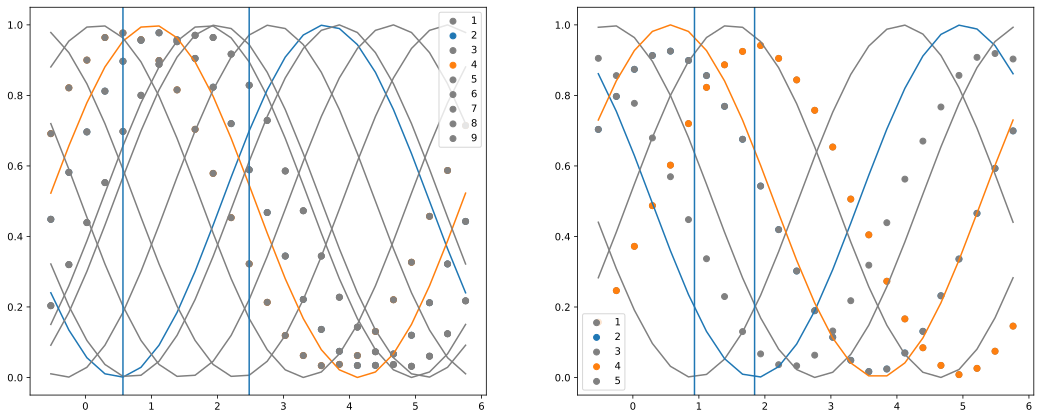

In [49]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 7))

skip = 3
for i in range(beta1_123456789.shape[0]):
    if i == 1 or i == 3:
        ax1.scatter(phase_swept[::skip], beta1_123456789[i][:, 0][::skip], label=f'{i+1}')
        ax1.plot(phase_swept[::skip], pop_beta_sim[i][:, 0][::skip])
    else:
        ax1.scatter(phase_swept[::skip], beta1_123456789[i][:, 0][::skip], label=f'{i+1}', color='grey')
        ax1.plot(phase_swept[::skip], pop_beta_sim[i][:, 0][::skip], color='grey')

for i in range(5):
    if i == 1 or i == 3:
        ax2.scatter(phase_swept[::skip], alpha1_123456789[i][:, 2][::skip], label=f'{i+1}')
        ax2.plot(phase_swept[::skip], pop_alpha_sim[i][:, 2][::skip])
    else:
        ax2.scatter(phase_swept[::skip], alpha1_123456789[i][:, 2][::skip], label=f'{i+1}', color='grey')
        ax2.plot(phase_swept[::skip], pop_alpha_sim[i][:, 2][::skip], color='grey')

ax1.axvline(phase_swept[12])
ax1.axvline(phase_swept[33])
ax2.axvline(phase_swept[16])
ax2.axvline(phase_swept[26])

for ax in [ax1, ax2]:
    ax.legend()

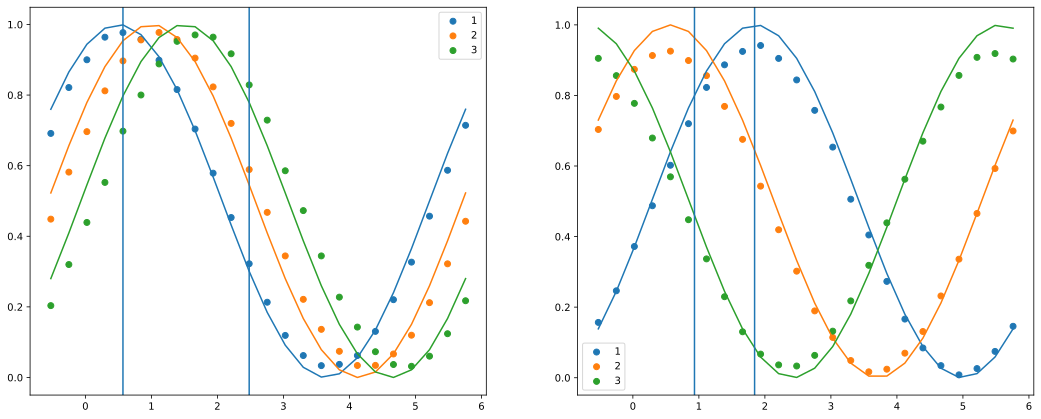

In [50]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 7))

skip = 3
for i in range(3):
    ax1.scatter(phase_swept[::skip], berry_beta_pop_123[i][:, 0][::skip], label=f'{i+1}')
    ax1.plot(phase_swept[::skip], pop_beta_berry_sim[i][:, 0][::skip])

for i in range(3):
    ax2.scatter(phase_swept[::skip], berry_alpha_pop_123[i][:, 2][::skip], label=f'{i+1}')
    ax2.plot(phase_swept[::skip], pop_alpha_berry_sim[i][:, 2][::skip])

ax1.axvline(phase_swept[12])
ax1.axvline(phase_swept[33])
ax2.axvline(phase_swept[16])
ax2.axvline(phase_swept[26])

for ax in [ax1, ax2]:
    ax.legend()